# Homework 8: Detecting Markers and Faces

Name:

Honor Code:

Blah ...

Help received from:

---

In [1]:
%matplotlib inline 

In [2]:
from __future__ import print_function, division
import cv2 # opencv
import time
import ar_markers
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [11]:
print('OpenCV {}'.format(cv2.__version__))
print('AR Markers {}'.format(ar_markers.__version__))

OpenCV 3.3.0
AR Markers 0.4.1


1. Read in the 3 AR markers, plot them in a 2x2 image array (*hint:* use `plt.subplot()`), and print out their marker id numbers

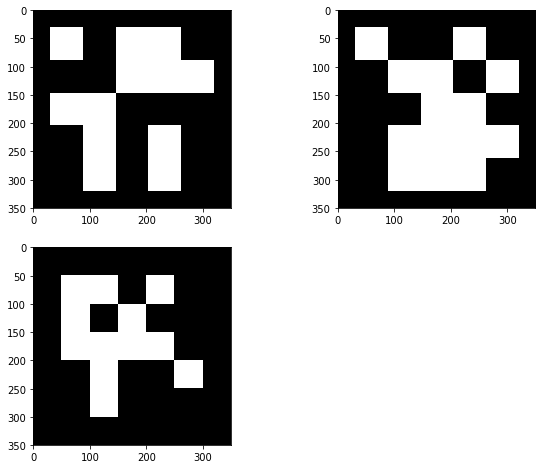

In [53]:
imgs = []
for im in ['ce_8/marker_2957.png', 'ce_8/marker_3663.png', 'ce_8/marker_3.png']:
    i = cv2.imread(im)
    imgs.append(i)
    
plt.subplot(2,2,1)
plt.imshow(imgs[0])
plt.subplot(2,2,2)
plt.imshow(imgs[1])
plt.subplot(2,2,3)
plt.imshow(imgs[2]);

In [54]:
for im in imgs:
    print(im.shape)
    markers = ar_markers.detect_markers(im)
    print(len(markers))
    print(markers)
    for m in markers:
        print('Marker ID:', m.id)

(350, 350, 3)
0
[]
(350, 350, 3)
0
[]
(350, 350, 3)
0
[]


1: Grab an image from your camera of your face and plot it with `plt.imshow()`

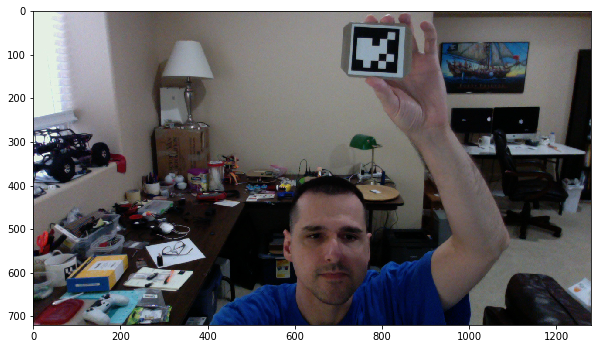

In [39]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
if ret:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)

cap.release()

2: Use OpenCV's face detector to find your face in the image you just took and draw a box around it.

Faces found: 1


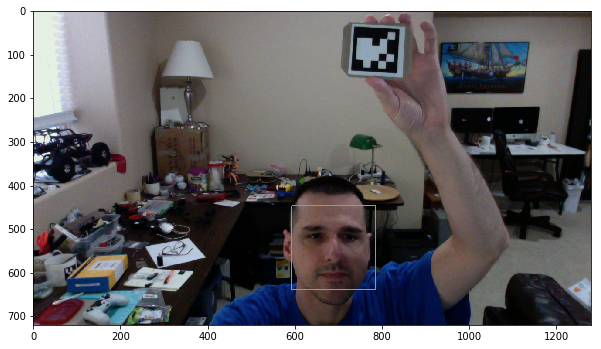

In [47]:
# convert our image to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

# load the haar face detector for the front
faceCascade = cv2.CascadeClassifier('ce_8/haarcascade_frontalface_default.xml')

faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=2,
    minNeighbors=2,
    minSize=(60, 60)
    #flags = cv2.CV_HAAR_SCALE_IMAGE
)

print('Faces found: {}'.format(len(faces)))

# make a copy of the image to draw on
tmp = frame.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(tmp, (x, y), (x+w, y+h), (0, 255, 0), 2)  # draw green rectangle

plt.imshow(tmp);

3: Find the marker in the image and draw a box around it with the number. Try: 

    marker.highlite_marker(image)

where `image` is the image you are writing on and `marker` is the marker that was found

Marker ID: 3663
Marker center: (785, 88)
Marker ID binary: 111001001111
Marker hamming_code: 001011010011001111111


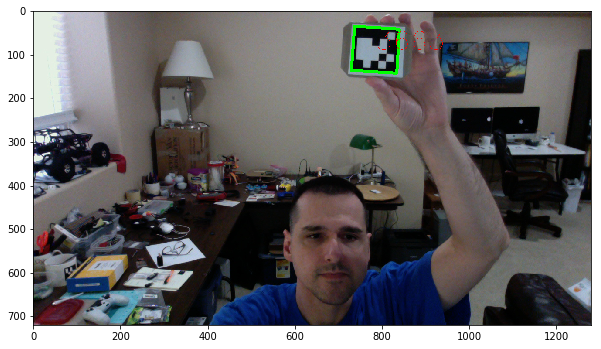

In [57]:
val = ar_markers.detect_markers(frame)

tmp = frame.copy()

ids = []
for marker in val:
    if marker.id in ids:
        continue
    ids.append(marker.id)
    print('Marker ID:', marker.id)
    print('Marker center:', marker.center)
    print('Marker ID binary:', marker.id_as_binary)
    print('Marker hamming_code:', marker.hamming_code)
    marker.highlite_marker(tmp)
    
plt.imshow(tmp);